<a href="https://colab.research.google.com/github/danteacosta/data_science/blob/master/An%C3%A1lise_do_COVID_19_no_Brasil_e_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

O COVID-19 é uma doença infecciosa causada pelo coronavírus SARS-CoV-2 e ao longo dos últimos meses impactou todo o planeta.

Sua transmissão acontece pelo contato com pessoas contaminadas a partir do toque, gotículas de saliva, espirro, tosse e aperto de mão, além de superfícies contaminadas. Seus sintomas são um tanto variaveis, bem como a gravidade deles a depender de alguns fatores físicos das pessoas, que podem colocá-las em um grupo de maior risco.

Até o momento não se tem informação completa sobre essa enfermidade, principalmente sobre como neutralizá-la com remédios e vacinas. Apesar dos diversos estudos ao redor do mundo, ainda não foi encontrada uma solução totalmente efetiva, muitos resultados são inconclusivos e têm mostragens ainda pequenas para o que se espera de uma metodologia científica.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/danteacosta/data_science/master/imagens/covid-hypoxia.jpg""></center>

De acordo com a Organização Mundial da Saúde, cerca de 80% dos casos confirmados são assintomáticos ou apenas apresentam sintomas leves, sem nenhum tipo de sequela.

No entanto, 15% das pessoas terão infecções mais graves e precisarão de tratamento com medicação e oxigênio. Já os 5% restantes são classificados como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em UTI's.

Com o objetivo de informar e analisar o problema do COVID-19 no Brasil e também compará-lo com os outros países, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

O *dataset* utilizados foram disponibilizados pelo [Our World in Data](https://ourworldindata.org/coronavirus), uma organização sem fins lucrativos responsável por pesquisas em dados, reconhecida por grande veículos de notícia, como a revista Science, e instituições de ensino, como Harvard.

A análise de uma doença mais recente é um tanto difícil, pois não houve tempo de um estudo tão aprofundado para identificar bem seus casos, soma-se a isso o fato de o Brasil ter uma grande subnotificação por falta de testes rápidos, além de discordâncias entre os meios de divulgação de números, sejam eles estaduais, federais ou extraoficiais.

### Dicionário de Variáveis
A seguir, trago em um tipo de dicionário a explicação de cada coluna caso haja necessidade de consulta para um entendimento melhor.


*   `life_expectancy` -Expectativa de vida do país de 2019
*   `hospital_beds_per_thousand` -Número de leitos por mil pessoas do ano mais recente desde 2010
*   `handwashing_facilities` -Porcentagem com acesso a facilidades de higiene básica do ano mais recente
*   `male_smokers` -Porcentagem de homens fumantes do ano mais recente
*   `female_smokers` -Porcentagem de mulheres fumantes do ano mais recente
*   `diabetes_prevalence` -Porcentagem de diabéticos(de 20 a 79 anos) em 2017
*   `cvd_death_rate` -Mortalidade de doença cardiovascular em 2017
*   `extreme_poverty` -Porcentagem da população vivendo em extrema pobreza do ano mais recente
*   `gdp_per_capita` -PIB per capita
*   `aged_70_older` -Porcentagem com 70 ou mais anos em 2015
*   `aged_65_older` -Porcentagem com 65 ou mais anos do ano mais recente
*   `median_age` -Idade média da população(projeção para 2020)
*   `population_density` -Densidade populacional
*   `population` -População em 2020
*   `stringency_index` -Avalia a rigidez da quarentena de 0 a 100
*   `tests_units` -Quantas unidades no país informam sobre os dados
*   `new_tests_smoothed_per_thousand` -Novos testes por milhar em uma semana(tratando irregularidades estatisticamente)
*   `new_tests_per_thousand` -Novos testes por milhar
*   `new_tests_smoothed` -Novos testes(tratando irregularidades estatisticamente)
*   `new_tests` -Novos testes
*   `total_tests` -Número absoluto de testes
*   `new_deaths_per_million` -Novas mortes por milhão
*   `total_deaths_per_million` -Total de mortes por milhão
*   `new_cases_per_million` -Novos casos por milhão
*   `total_cases_per_million` -Total de casos por milhão
*   `new_deaths` -Novas mortes
*   `total_deaths` -Total de mortes
*   `new_cases` -Novos casos
*   `total_cases` -Total de casos
*   `date` -Data de registros
*   `location` -Localização de registro
*   `continent` -Continente do registro
*   `iso_code` -Código de registro
Feito isso, vamos agora buscar nossos dados na fonte.



### Importando os dados do COVID-19

Vamos agora importar as bibliotecas necessárias para realizar a análise e também o *dataset* mais recente, do dia 07/07/20. Se você tiver interesse em consultar a fonte da informação, clique [aqui](https://github.com/owid/covid-19-data/tree/master/public/data) para ser direcionado ao GitHub da organização, onde eles armazenam tudo sobre.

In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importar o dataset COVID-19 para um DataaFrame
df=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise Exploratória dos Dados

Como estamos vendo o *DataFrame* pela primeira vez, vamos fazer uma análise inicial mais simples para nos ambientarmos e entendermos como ele está distribuído.
### Análise Exploratória Inicial
Vamos buscar nas primeiras e últimas entradas por valores diferentes do esperado e avaliar a presença deles se existentes.



In [ ]:
#Verificando as entradas iniciais
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Podemos ver que os casos são informados por cada país e com suas respectivas evoluções de casos diárias, contando de 31 de dezembro do ano passado, que no caso do Afeganistão ainda não havia registro de caso.

In [ ]:
#Vendo as entradas finais
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28919,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28920,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28921,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28922,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28923,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora vemos que existe uma parte internacional da tabela, que por ser um panorama geral, muitos dados que foram feitos para serem de um país não foram registrados, vamos ver posteriormente como isso vai afetar a distribuição da informação

In [ ]:
#Verificando os registros internacionais
df[df.location =='International']

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28860,NaN,NaN,International,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28861,NaN,NaN,International,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28862,NaN,NaN,International,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28863,NaN,NaN,International,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28864,NaN,NaN,International,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28919,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28920,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28921,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28922,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que existem 64 entradas registradas desde 31 de dezembro de 2019 até 10 de março de 2020, é estranho esse tipo de contagem ter sido descontinuada e ainda analisaremos o que ocorreu. Como são apenas 64 registros dentre 28243, provavelmente os valores ausentes não vão influenciar muito nossas conclusões posteriores.

In [ ]:
#Conferindo o formato/dimensões do DataFrame
df.shape

(28924, 34)



Em geral, vemos 28924 entradas com informações de 34 colunas/variáveis distintas até o dia em que fazemos essa análise.

In [ ]:
#Buscando informação do nome das colunas, seus tipos e quantos valores são nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28664 entries, 0 to 28663
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         28600 non-null  object 
 1   continent                        28410 non-null  object 
 2   location                         28664 non-null  object 
 3   date                             28664 non-null  object 
 4   total_cases                      28440 non-null  float64
 5   new_cases                        28440 non-null  float64
 6   total_deaths                     28440 non-null  float64
 7   new_deaths                       28440 non-null  float64
 8   total_cases_per_million          28376 non-null  float64
 9   new_cases_per_million            28376 non-null  float64
 10  total_deaths_per_million         28376 non-null  float64
 11  new_deaths_per_million           28376 non-null  float64
 12  total_tests       

Agora podemos ver o nome de todas as variáveis, seus tipos(basicamente *floats* para dados numéricos e *object* para dados de registro/consulta). Junto a isso, temos como constatar que algumas colunas estão com um número considerável de dados ausentes, possivelmente por se tratar de informações do mundo todo e nem todos os países serem transparentes a respeito. Vejamos agora a porcentagem desses valores no *dataset*

In [ ]:
#Vendo percentualmente a ausência de dados em cada coluna do maior para o menor
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

new_tests                          0.712868
new_tests_per_thousand             0.712868
total_tests_per_thousand           0.699039
total_tests                        0.699039
new_tests_smoothed_per_thousand    0.674492
new_tests_smoothed                 0.674492
tests_units                        0.650740
handwashing_facilities             0.590928
extreme_poverty                    0.403679
male_smokers                       0.287408
female_smokers                     0.278972
stringency_index                   0.194199
hospital_beds_per_thousand         0.176220
aged_65_older                      0.111015
gdp_per_capita                     0.108595
aged_70_older                      0.102787
median_age                         0.098154
cvd_death_rate                     0.097117
diabetes_prevalence                0.067591
population_density                 0.044081
life_expectancy                    0.013933
new_deaths_per_million             0.011686
total_deaths_per_million        

Nota-se que principalmente informações de testagem estão faltando e algumas outras informações mais relacionadas ao estilo e qualidade de vida das populações estão faltando.

Como a coluna `date` está como tipo *object* e não no formato `datetime`, convém convertemos para podermos adiante buscar informações de datas específicas.

In [ ]:
#Fazendo a conversão de formato da coluna
df.date=pd.to_datetime(df.date)

### Panorama mundial
Agora vamos observar o panorama geral até o dia atual da análise(8 de julho).

In [ ]:
#Observando os países pela ordem decrescente de mortes
df.loc[df.date == '2020-07-08'].sort_values(by="total_deaths", ascending=False)[0:6]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28859,OWID_WRL,NaN,World,2020-07-08,11801805.0,206641.0,543902.0,6087.0,1514.062,26.510,69.778,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
27523,USA,North America,United States,2020-07-08,2996098.0,57473.0,131480.0,1174.0,9051.583,173.633,397.217,3.547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3908,BRA,South America,Brazil,2020-07-08,1668589.0,45305.0,66741.0,1254.0,7849.989,213.140,313.988,5.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
27332,GBR,Europe,United Kingdom,2020-07-08,286349.0,581.0,44391.0,155.0,4218.086,8.558,653.905,2.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
13512,ITA,Europe,Italy,2020-07-08,241956.0,137.0,34899.0,30.0,4001.798,2.266,577.207,0.496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51
17252,MEX,North America,Mexico,2020-07-08,268008.0,6258.0,32014.0,895.0,2078.665,48.537,248.300,6.942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05


Assim, vemos que até agora são 11.801.805 casos e 543.902 mortos no mundo todo, em geral isso representa uma mortalidade próxima de 5% e vai de encontro ao exposto no começo do projeto, os países com o maior número absoluto de óbitos são:

*   Estados Unidos(131.480 mortes)
*   Brasil(66.741 mortes)
*   Reino Unido(44.391 mortes)
*   Itália(34.899 mortes)
*   México(32.014 mortes)

Vimos também que existem 2 localizações representando a situação global, tanto a "World" e "International", o que pode representar um problema de dados repetidos. Agora, vamos analisar os países com mais casos e buscar alguma relação.




In [ ]:
#Observando os países com maior total de casos e a situação geral
df.loc[df.date == '2020-07-08'].sort_values(by="total_cases", ascending=False)[0:6]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28859,OWID_WRL,NaN,World,2020-07-08,11801805.0,206641.0,543902.0,6087.0,1514.062,26.510,69.778,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
27523,USA,North America,United States,2020-07-08,2996098.0,57473.0,131480.0,1174.0,9051.583,173.633,397.217,3.547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3908,BRA,South America,Brazil,2020-07-08,1668589.0,45305.0,66741.0,1254.0,7849.989,213.140,313.988,5.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
12267,IND,Asia,India,2020-07-08,742417.0,22752.0,20642.0,482.0,537.982,16.487,14.958,0.349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
21837,RUS,Europe,Russia,2020-07-08,694230.0,6368.0,10494.0,198.0,4757.135,43.636,71.909,1.357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
20724,PER,South America,Peru,2020-07-08,309278.0,3575.0,10952.0,180.0,9380.063,108.426,332.162,5.459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.800,NaN,NaN,1.600,76.74


Vemos que Estados Unidos, com 2.996.098 casos, e o Brasil, com 1.668.589, seguidos por Rússia, 694.230 ocorrências e Índia 742.417, além do Peru, que é um país menor e mesmo assim tem mais de 300 mil casos. Apesar de Rússia e Índia terem muitos casos e população grande, eles não estão entre os com mais óbitos, possivelmente pela forma com que cada um lidou com a quarentena. 

Agora vamos para uma análise mais proporcional da situação.



In [ ]:
#Vendo os 5 países com o número de mortes por milhão
df.loc[df.date == '2020-07-08'].sort_values(by="total_deaths_per_million", ascending=False)[:5]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
22471,SMR,Europe,San Marino,2020-07-08,713.0,0.0,42.0,0.0,21008.899,0.000,1237.551,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33938.0,556.667,NaN,NaN,NaN,56861.470,NaN,NaN,5.64,NaN,NaN,NaN,3.80,84.97
2834,BEL,Europe,Belgium,2020-07-08,62123.0,65.0,9776.0,2.0,5360.229,5.608,843.514,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,18.571,12.849,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63
605,AND,Europe,Andorra,2020-07-08,855.0,0.0,52.0,0.0,11065.812,0.000,673.008,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
27332,GBR,Europe,United Kingdom,2020-07-08,286349.0,581.0,44391.0,155.0,4218.086,8.558,653.905,2.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
13512,ITA,Europe,Italy,2020-07-08,241956.0,137.0,34899.0,30.0,4001.798,2.266,577.207,0.496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60461828.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51


Proporcionalmente vemos novamente o Reino Unido e a Itália como bastante atingidos, além de países muito pequenos, como San Marino e Andorra que não passam de mil casos mas por sua população reduzida significa uma parcela considerável vindo a óbito. Ainda temos o caso da Bélgica, que é um tanto incomum pela forma que as mortes são contabilizadas, pois o governo decidiu incluir também casos suspeitos. Essa diferença de abordagem significou um número maior da mortalidade

### Visualização dos dados
Vamos agora buscar representar os dados a partir de gráficos para entender e visualizar melhor a situação.

<BarContainer object of 5 artists>

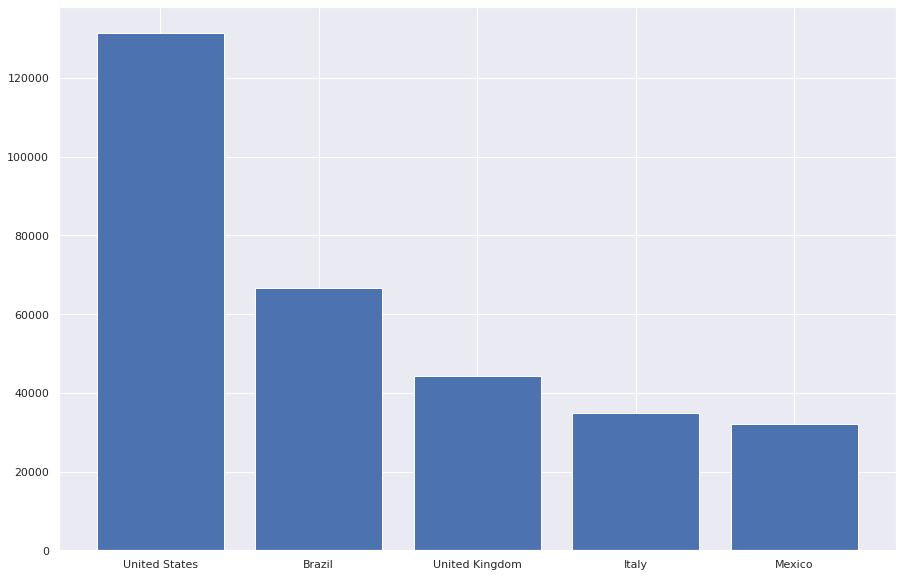

In [ ]:
#Gráfico em barra dos  5 países com mais mortes
top5_deaths=df.loc[df.date == '2020-07-08', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location','total_deaths',data=top5_deaths)

Visualmente vemos o quanto os Estados Unidos sofreu com o vírus, com praticamente mais de o dobro de óbitos que o Brasil, que como podemos falar com mais propriedade, também sofre muito com o Covid-19. Esses dois países vemos que tiveram mais problemas até aqui, enquanto Reino Unido e Itália sofreram mais no começo da pandemia mas estão conseguindo se estabilizar melhor.

In [ ]:
# gráfico de linha para casos no mundo
df.loc[df.location == "World", "new_cases"].reset_index(drop=True).plot(figsize=(10,8));


De fato ainda estamos longe de ter uma estabilização a nível mundial, visto que ainda temos por volta de 200 mil casos por dia. Vamos ver agora em países em estágios diferentes da luta contra o vírus.

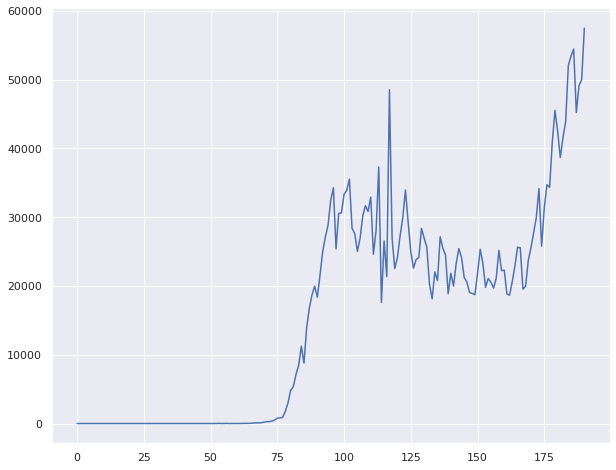

In [ ]:
#Gráfico de casos diários nos Estados Unidos
df.loc[df.location == "United States", "new_cases"].reset_index(drop=True).plot(figsize=(10,8));

In [ ]:
#Gráficos de casos diários da Itália
df.loc[df.location == "Italy", "new_cases"].reset_index(drop=True).plot(figsize=(10,8));

Olhando o primeiro gráfico(Estados Unidos) e comparando ao segundo(Itália), vemos que os países estão em situações bem distintas, a ascensão de casos italiana foi um pouco antes, mas teve uma redução considerável em relação ao pico, enquanto os Estados Unidos ainda estão em crescente considerável, possivelmente uma quarentena mais restrita corroborou com essa melhora.

Agora vamos buscar correlação entre as variáveis numéricas em busca de alguma correlação que esclareça melhor a situação.

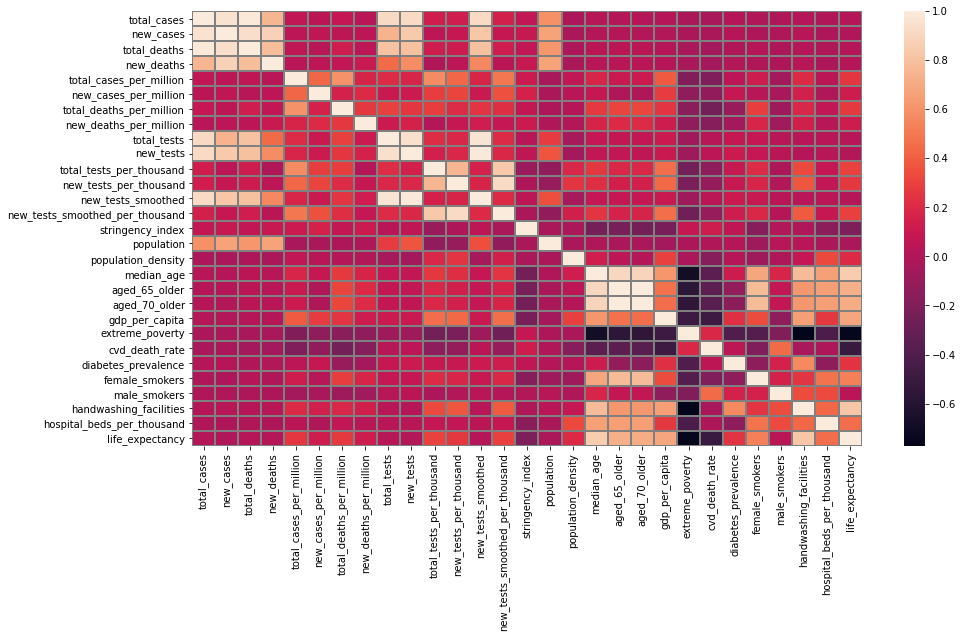

In [ ]:
#Heatmap para tentar encontrar correlações entre nossas variáveis
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),linecolor='gray', linewidths=1,ax=ax)
plt.show()

Sabendo que quanto mais próximo de 1.0, maior a correlação. Podemos conclur algumas coisas:


*   Países mais ricos(em relação a PIB per capita) estão testando mais sua população e por consequência têm mais registros de caso
*   Há também uma correlação entre fumantes e mortes, algo que faz sentido visto que a doença atinge o sistema respiratório, que já costuma ser comprometido pelo tabagismo
*   Não vemos muita relação entre os outros indicadores relacionados a grupo de risco e mortes, possivelmente por isolamento social dessa parcela.

Como vimos Brasil e México nos países com mais mortes e eles são emergentes, vamos agora ver se indicadores econômicos e mortes têm alguma relação.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


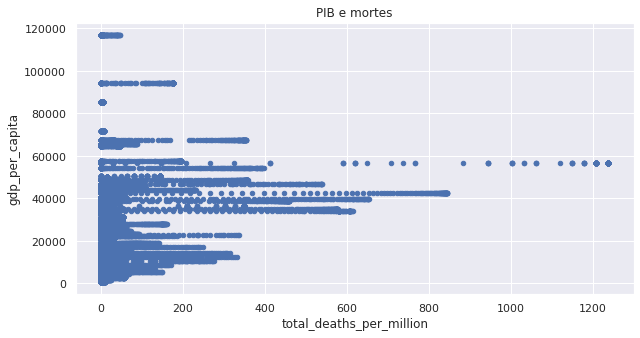

In [ ]:
# Avaliando total de mortes por milhão vs PIB per capita

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('PIB e mortes')
df.plot.scatter(x='total_deaths_per_million', y='gdp_per_capita', ax=ax1)
plt.show()

Aqui vemos que em geral, países mais carentes estão sofrendo mais com a doença, pois existem muito mais mortes na parte inferior do gráfico. 

Esse indicador tem relevância mas não deve ser o único a ser analisado, pois existem outros fatores que influenciam nos números, tal como testagem e como o país lidou com a questão.

### Situação do Brasil
Agora que vimos a situação de forma mais genérica, vamos aprofundar nosso estudo ao Brasil e entender como a doença se desenvolve no Brasil. Para isso, vamos delimitar nosso *dataset* apenas para o país e realizar a análise.

In [3]:
#Separando o dataset para analisar apenas o Brasil
df_brasil=df.loc[df.location == "Brazil"].copy()

In [ ]:
#Vendo os registros iniciais
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3718,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3719,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3720,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3721,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3722,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Vemos que no começo da contagem todos os dados estavam zerados, agora vamos ver quando foi registrado o primeiro caso no país.

In [ ]:
#Vendo o primeiro registro de Covid-19 no Brasil
df_brasil.loc[df_brasil["new_cases"]!= 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3775,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
#Vendo o primeiro registro de morte por Covid-19 no Brasil
df_brasil.loc[df_brasil["new_deaths"]!= 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3796,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Podemos observar que o primeiro caso foi no dia 26 de fevereiro e que a primeira morte foi em 18 de março, 3 semanas após a primeira ocorrência.
Agora vamos ver como a situação está nesses últimos dias.

In [ ]:
#Vendo a situação nos últimos 5 dias
df_brasil.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3904,BRA,South America,Brazil,2020-07-04,1539081.0,42223.0,63174.0,1290.0,7240.710,198.641,297.206,6.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3905,BRA,South America,Brazil,2020-07-05,1577004.0,37923.0,64265.0,1091.0,7419.121,178.411,302.339,5.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3906,BRA,South America,Brazil,2020-07-06,1603055.0,26051.0,64867.0,602.0,7541.680,122.559,305.171,2.832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3907,BRA,South America,Brazil,2020-07-07,1623284.0,20229.0,65487.0,620.0,7636.848,95.169,308.088,2.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3908,BRA,South America,Brazil,2020-07-08,1668589.0,45305.0,66741.0,1254.0,7849.989,213.140,313.988,5.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Vemos alguma redução por conta da subnotificação em finais de semana, mas em geral vemos os números subindo de forma contínua, o que preocupa ainda mais por considerarmos que muitos estados já estão em processo de reabertura de comércio e outros serviços.

Agora vamos ilustrar melhor a situação a partir de gráficos

#### Gráficos do Brasil
Vamos agora ilustrar melhor a situação, mais especificamente o número de casos e mortes

In [ ]:
#Vendo quantos dias se passou desde o primeiro dia de contagem
from datetime import date
delta = df.date.loc[3908] - df.date.loc[3718]
delta

Timedelta('190 days 00:00:00')

Temos até agora 190 dias de contagem(além do dia de hoje que devemos incluir), o que dá nosso eixo horizontal. Por fim, vamos plotar gráficos de linha em escala logarítmica para ter uma visão melhor, pois temos uma grande gama de valores de casos e mortes.

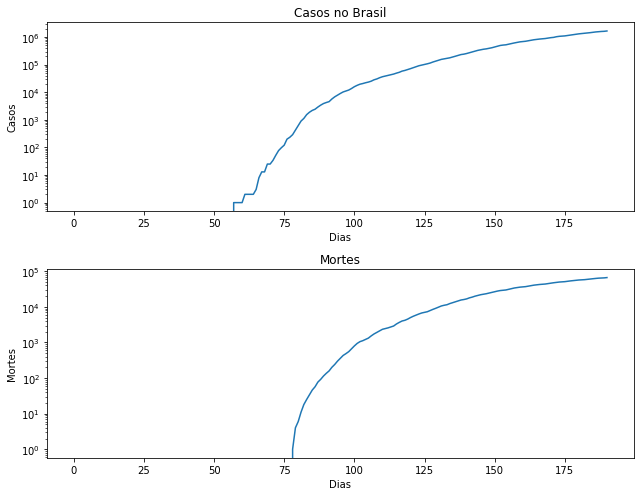

In [4]:
#Plotando 
x = list(range(191))
y1 = df_brasil['total_cases']
y2 = df_brasil['total_deaths']

fig, ((ax2, ax3)) = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))
ax2.set_title('Casos no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, y1)

ax3.set_title('Mortes')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.set_yscale('log')
ax3.plot(x, y2)
plt.tight_layout()

Vemos que infelizmente ainda estamos em franco avanço da doença no país

## Conclusão
Até o dia de hoje podemos chegar a algumas conclusões, mesmo que com uma análise mais simples. Tais como:


*   Os Estados Unidos, pelo menos em números absolutos, é o mais afetado até então, disparado em número de casos e mortes
*   Os casos e mortes no Brasil ainda não deram sinal de melhora, o que preocupa em um cenário de retomada das atividades comuns antes da pandemia
*   Apesar de não haver tanta cobertura no Brasil, países como o México e o Peru também estão em sérias dificuldades em relação ao Covid-19
*   Mesmo com algumas exceções de controle do vírus, o mundo como um todo está sendo muito afetado

Mesmo com um *dataset* geral e que nem sempre será abastecido de dados confiáveis pelos governos, conseguimos extrair algumas informações importantes e ilustrá-las para melhor compreensão geral.